In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
RAND_STATE_VALUE = 42

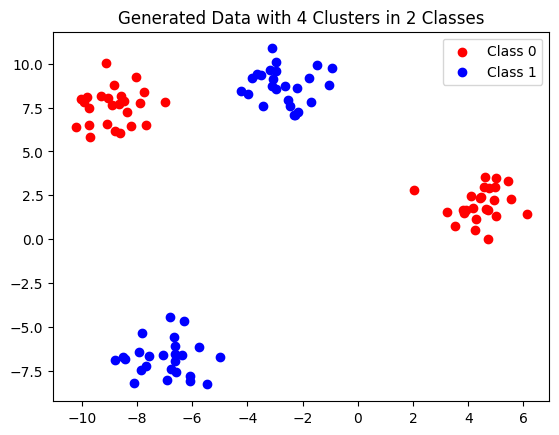

In [3]:
data, labels = make_blobs(n_samples = 100, n_features = 2, centers = 4, cluster_std = 1.0, random_state = RAND_STATE_VALUE)
labels =(labels % 2 == 0).astype(int) # Convert labels to 2 classes
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], c = "red", label = "Class 0")
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], c = "blue", label = "Class 1")
plt.title("Generated Data with 4 Clusters in 2 Classes")
plt.legend()
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, random_state = RAND_STATE_VALUE)

In [5]:
model = Sequential([
    layers.Flatten(input_shape =(2,)),
    layers.Dense(3, activation = "relu"),
    layers.Dense(2),
    layers.Softmax()
])

In [6]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics =["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 2)                 8         
                                                                 
 softmax (Softmax)           (None, 2)                 0         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.2, verbose = 0)

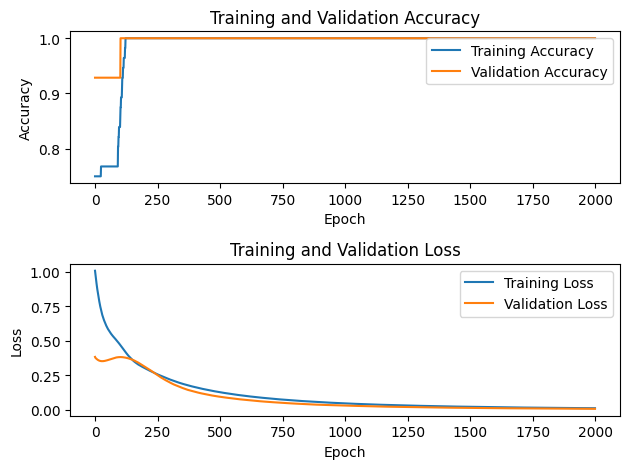

In [9]:
# Plot training history for accuracy
plt.subplot(2, 1, 1)
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot training history for loss
plt.subplot(2, 1, 2)
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
model.predict(X_test)

1/1 [==============================] - 0s 102ms/step


array([[9.9011630e-01, 9.8837093e-03],
       [2.2431501e-05, 9.9997753e-01],
       [9.7128570e-01, 2.8714271e-02],
       [1.8878083e-05, 9.9998111e-01],
       [1.2665929e-03, 9.9873346e-01],
       [9.7128570e-01, 2.8714271e-02],
       [9.9992436e-01, 7.5553864e-05],
       [9.7128570e-01, 2.8714271e-02],
       [6.1191339e-04, 9.9938816e-01],
       [9.9993116e-01, 6.8787791e-05],
       [9.9999398e-01, 5.9499789e-06],
       [8.3739842e-06, 9.9999160e-01],
       [7.8033530e-03, 9.9219668e-01],
       [9.9988216e-01, 1.1772976e-04],
       [9.7128570e-01, 2.8714271e-02],
       [9.9970591e-01, 2.9413801e-04],
       [2.1037329e-07, 9.9999970e-01],
       [9.9996918e-01, 3.0783551e-05],
       [5.5809678e-06, 9.9999434e-01],
       [9.7128570e-01, 2.8714271e-02],
       [9.9990278e-01, 9.7096330e-05],
       [2.2628291e-02, 9.7737157e-01],
       [9.7128570e-01, 2.8714271e-02],
       [1.5866461e-07, 9.9999982e-01],
       [2.4014535e-06, 9.9999762e-01],
       [9.9999249e-01, 7.

In [11]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_pred

1/1 [==============================] - 0s 24ms/step


array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0])

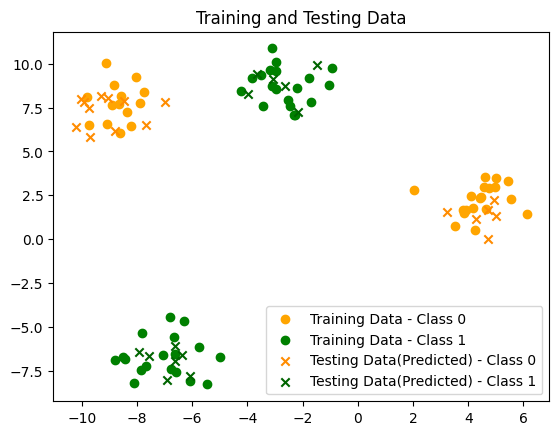

In [12]:
# Plot the training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c = "orange", marker = "o", label = "Training Data - Class 0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c = "green", marker = "o", label = "Training Data - Class 1")

# Plot the testing data with predicted labels
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c = "darkorange", marker = "x", label = "Testing Data(Predicted) - Class 0")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c = "darkgreen", marker = "x", label = "Testing Data(Predicted) - Class 1")
plt.title("Training and Testing Data")
plt.legend()
plt.show()

In [13]:
model.get_weights()

[array([[-0.53625786, -0.6248864 , -1.8156028 ],
        [ 0.7683029 , -0.85239327, -0.6088676 ]], dtype=float32),
 array([-0.45337495,  0.2538381 , -0.2153463 ], dtype=float32),
 array([[-1.3625903 , -0.03013652],
        [-2.1291304 ,  2.181671  ],
        [ 1.5577441 , -0.18930566]], dtype=float32),
 array([ 1.7606134, -1.7606131], dtype=float32)]

In [14]:
x_new = np.array([[0, 0]])
model.predict(x_new)

1/1 [==============================] - 0s 59ms/step


array([[0.91886175, 0.08113827]], dtype=float32)

## Manual Calcualtion

Before going to the hidden layer, $z$ is calculated by this formula:

$$z = \left(\sum_{i = 1}^{n}w_i \cdot x_i\right) + \text{bias} \quad\text{for } i = 1, 2, \ldots, n$$

where:
- $n$ is the number of features
- $w_i$ represents the weights associated with each input feature
- $x_i$ represents the input features
- $\text{bias}$ is a bias term

The activation function used in the hidden layer is the ReLU function.

$$\hat{y} = \text{ReLU}(z)$$

The ReLU function is defined as:

$$\text{ReLU}(x) = \max(0, x)$$

For the output layer, softmax is used to convert a vector of real numbers into a probability distribution.

$$\text{softmax}(\mathbf{x})_i = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}} \quad\text{for } i = 1, 2, \ldots, n$$

where:
- $n$ is the number of features
- $e$ is Euler's number, approximately equal to 2.718...
- $x_i$ represents the i-th element of the input vector $\mathbf{x}$
- $x_j$ represents the j-th element of the input vector $\mathbf{x}$, where $j$ ranges from 1 to $n$

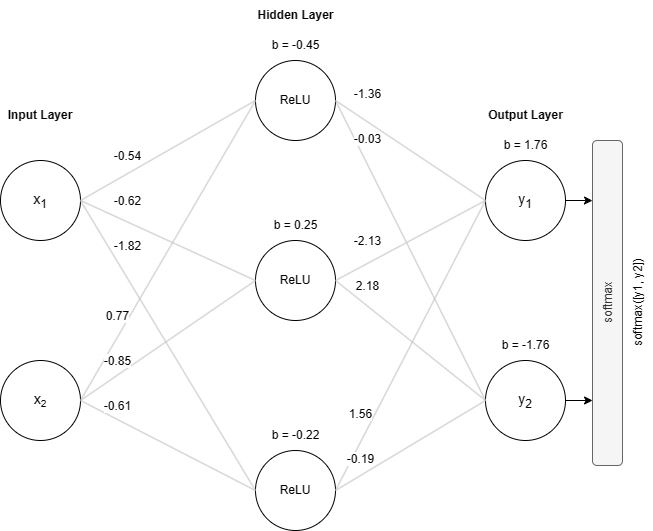

In [15]:
def Z(w: list, x: list, bias: float = 0) -> float:
    sum_val = np.dot(w, x) + bias
    return sum_val

def ReLU(x: float) -> float:
    return x if x > 0 else 0

def softmax(z: list) -> float:
    e = np.exp(z)
    return e / e.sum()

### Example

In [17]:
X = [0, 0]

input_W1 = [-0.53, 0.77]
input_W2 = [-0.62, -0.85]
input_W3 = [-1.82, -0.61]

hidden1 = ReLU(Z(input_W1, X, -0.45))
hidden2 = ReLU(Z(input_W2, X, 0.25))
hidden3 = ReLU(Z(input_W3, X, -0.21))

L1 = [hidden1, hidden2, hidden3]

L1_W1 = [-1.36, -2.13, 1.56]
L1_W2 = [-0.03, 2.18, -0.19]

output1 = Z(L1_W1, L1, 1.76)
output2 = Z(L1_W2, L1, -1.76)

y_prob = softmax([output1, output2])
y_prob

array([0.92001126, 0.07998874])